 Gradient Boosting — Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00        73

    accuracy                           1.00      1461
   macro avg       1.00      1.00      1.00      1461
weighted avg       1.00      1.00      1.00      1461



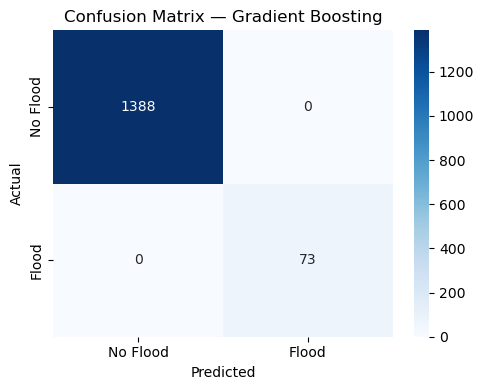

ROC-AUC (GB): 1.000


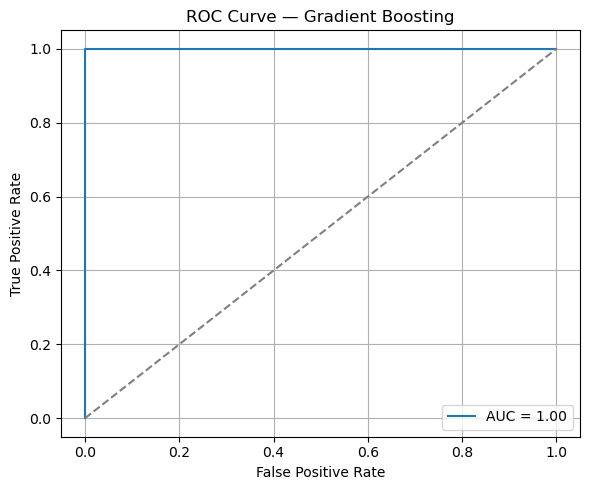

CV F1 scores (GB): [0.99319728 0.99310345 1.         0.99310345 1.        ]
Mean F1 (GB): 0.9958808350926578


In [1]:
# models/gradient_boosting_flood.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump


# data loading------
df = pd.read_csv("flood_model_lagged.csv", parse_dates=["date"])
X = df.drop(columns=["date", "flood"])
y = df["flood"]


# -------- Train, test spli--------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)



# model training ----------
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


# -------- Predictions and probabilities part ------------
y_pred  = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:, 1]

# -------- Text metrics of model-------
print(" Gradient Boosting — Classification Report")
print(classification_report(y_test, y_pred, digits=2))

# ---------Confusion Matri-------------
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Flood", "Flood"],
    yticklabels=["No Flood", "Flood"]
)
plt.title("Confusion Matrix — Gradient Boosting")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# ----- ROC Curve and AUC of model--------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC (GB): {roc_auc:.3f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Gradient Boosting")
plt.legend(loc="lower right"); plt.grid(True)
plt.tight_layout(); plt.show()

# ------------ Cross-Validation of gradient boosting model --
cv_scores = cross_val_score(gb, X, y, cv=5, scoring="f1")
print("CV F1 scores (GB):", cv_scores)
print("Mean F1 (GB):", cv_scores.mean())

# --------- Saving model ---
dump(gb, "gb_flood_model.pkl")
print("Saved: gb_flood_model.pkl")
